In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from scipy import stats
%matplotlib inline
titanic = pd.read_csv('train.csv')

In [114]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


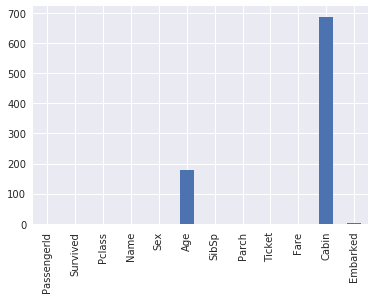

In [115]:
# now to look for missing values. 
type(titanic.isnull().sum())
#I do not think this is a graphically useful question to answer. There are only three columns missing values( one is missing 2, one is missing 177 and one is missing 687.)
#but here is what is looks like.

titanic.isnull().sum().plot(kind='bar')


In [116]:
# lets assume no embarked is a bad sign, and lets scrub it. 
titanic2 = titanic.dropna(how='any', subset=['Embarked'])

In [117]:
# to make sure that worked. 

titanic2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [281]:
# I don't know where a lot of the cabins where. And everything is better with shruggie (Shruggie is currently my wifi)
# so we'll use the code titanic2['Cabin'].fillna(value='**Â¯\\_(ãƒ„)_/Â¯**')


In [168]:
titanic['Cabin'].shape[0]

891

In [162]:
titanic[titanic['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [124]:
titanic2['Cabin'] =titanic2['Cabin'].fillna(value='**Â¯\\_(ãƒ„)_/Â¯**')

#Let's confirm that it worked. 
print(titanic2.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare              Cabin Embarked  
0      0         A/5 21171   7.2500  **Â¯\_(ãƒ„)_/Â¯**        S  
1      0          PC 17599  71.2833                C85        C  
2      0  STON/O2. 3101282   7.9250  **Â¯\_(ãƒ„)_/Â¯**        S  
3      0            113803  53.1000               C123  

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
# now to make a totaly number of family members column
titanic2['FamilyCount']= (titanic2['SibSp'])+(titanic2['Parch'])
titanic2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**Â¯\_(ãƒ„)_/Â¯**,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**Â¯\_(ãƒ„)_/Â¯**,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**Â¯\_(ãƒ„)_/Â¯**,S,0


In [126]:
# religion is magic, so lets look for reverands
titanic2[titanic2['Name'].str.contains('Rev')].head(100)
# now we know we have some
titanic2['IsReverand']= titanic2['Name'].str.contains('Rev.').astype(int)
print(titanic2.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare              Cabin Embarked  FamilyCount  \
0      0         A/5 21171   7.2500  **Â¯\_(ãƒ„)_/Â¯**        S            1   
1      0          PC 17599  71.2833                C85        C            1   
2      0  STON/O2. 3101282   7.9250  **Â¯\_(ãƒ„)_/Â¯**        S            0   


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [128]:
# so lets dummy up some values
embarked_dummies=pd.get_dummies(titanic2.Embarked, prefix='Embarked_').iloc[:, :]
titanic2['IsFemale'] = (titanic.Sex=='female').astype(int)
titanic2['IsMale'] = (titanic.Sex=='male').astype(int)


titanic2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverand,IsFemale,IsMale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**Â¯\_(ãƒ„)_/Â¯**,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**Â¯\_(ãƒ„)_/Â¯**,S,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**Â¯\_(ãƒ„)_/Â¯**,S,0,0,0,1


In [129]:
# now lets finish with our features and start some eda

titatanicgraph= pd.concat([titanic2,embarked_dummies], axis=1)
print(titatanicgraph.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare              Cabin Embarked  FamilyCount  \
0      0         A/5 21171   7.2500  **Â¯\_(ãƒ„)_/Â¯**        S            1   
1      0          PC 17599  71.2833                C85        C            1   
2      0  STON/O2. 3101282   7.9250  **Â¯\_(ãƒ„)_/Â¯**        S            0   


In [233]:
#time for more feature engineering
def titlepull(title_string):
    title_list = title_string.split()
    for possible_title in title_list:
        if possible_title[-1] == '.':
            return possible_title
def cabinpull(cabin_string):
    if cabin_string[0]=='*':
        return '?'
    else:
        return cabin_string[0]
titatanicgraph['Deck']=titatanicgraph.Cabin.apply(cabinpull)
titatanicgraph['Title']= titatanicgraph.Name.apply(titlepull)
titatanicgraph.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilyCount,IsReverand,IsFemale,IsMale,Embarked__C,Embarked__Q,Embarked__S,Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,1,0,0,1,0,0,1,?,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,1,0,1,0,0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,1,0,0,0,1,?,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,0,1,0,0,0,1,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,0,1,0,0,1,?,Mr.


In [211]:
# raw stats
print(titatanicgraph['Survived'].describe())
# notes, we have a 38 percent survival rate. 


count    889.000000
mean       0.382452
std        0.486260
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


In [213]:
print(titatanicgraph[titatanicgraph.IsMale== 1]['Survived'].describe())

count    577.000000
mean       0.188908
std        0.391775
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Survived, dtype: float64


In [214]:
print(titatanicgraph[titatanicgraph.IsMale== 0]['Survived'].describe())

count    312.000000
mean       0.740385
std        0.439128
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


In [234]:
print(titatanicgraph.groupby('Embarked').describe()['Survived'])
print(titatanicgraph.groupby('Pclass').describe()['Survived'])
print(titatanicgraph.groupby('Sex').describe()['Survived'])
print(titatanicgraph.groupby('Title').describe()['Survived'])
print(titatanicgraph.groupby('Deck').describe()['Survived'])

          count      mean       std  min  25%  50%  75%  max
Embarked                                                    
C         168.0  0.553571  0.498608  0.0  0.0  1.0  1.0  1.0
Q          77.0  0.389610  0.490860  0.0  0.0  0.0  1.0  1.0
S         644.0  0.336957  0.473037  0.0  0.0  0.0  1.0  1.0
        count      mean       std  min  25%  50%  75%  max
Pclass                                                    
1       214.0  0.626168  0.484954  0.0  0.0  1.0  1.0  1.0
2       184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0
3       491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0
        count      mean       std  min  25%  50%  75%  max
Sex                                                       
female  312.0  0.740385  0.439128  0.0  0.0  1.0  1.0  1.0
male    577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0
           count      mean       std  min   25%  50%   75%  max
Title                                                          
Capt.        1.0  0.000000       NaN

In [235]:
print(titatanicgraph[(titatanicgraph['IsReverand']==1) & (titatanicgraph['Survived']==0)])
# every reverand on board died. 


     PassengerId  Survived  Pclass                               Name   Sex  \
149          150         0       2  Byles, Rev. Thomas Roussel Davids  male   
150          151         0       2         Bateman, Rev. Robert James  male   
249          250         0       2      Carter, Rev. Ernest Courtenay  male   
626          627         0       2     Kirkland, Rev. Charles Leonard  male   
848          849         0       2                  Harper, Rev. John  male   
886          887         0       2              Montvila, Rev. Juozas  male   

      Age  SibSp  Parch       Ticket    Fare  ...  Embarked FamilyCount  \
149  42.0      0      0       244310  13.000  ...         S           0   
150  51.0      0      0  S.O.P. 1166  12.525  ...         S           0   
249  54.0      1      0       244252  26.000  ...         S           1   
626  57.0      0      0       219533  12.350  ...         Q           0   
848  28.0      0      1       248727  33.000  ...         S           1

In [148]:
titatanicgraph[titatanicgraph.Cabin=='**Â¯\_(ãƒ„)_/Â¯**'].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverand,IsFemale,IsMale,Embarked__C,Embarked__Q,Embarked__S
count,687.000000,687.000000,687.000000,529.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,443.208151,0.299854,2.639010,27.555293,0.547307,0.365357,19.157325,0.912664,0.008734,0.315866,0.684134,0.144105,0.106259,0.749636
std,259.215905,0.458528,0.589602,13.472634,1.207492,0.827106,28.663343,1.740765,0.093113,0.465199,0.465199,0.351452,0.308393,0.433538
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214.500000,0.000000,2.000000,19.000000,0.000000,0.000000,7.877100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
50%,441.000000,0.000000,3.000000,26.000000,0.000000,0.000000,10.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,664.500000,1.000000,3.000000,35.000000,1.000000,0.000000,23.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,74.000000,8.000000,6.000000,512.329200,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [327]:
#lets go hunting for large families
#print(titatanicgraph(titatanicgraph['Name']))
#print(titatanicgraph[titatanicgraph['FamilyCount']==2])
#print(titatanicgraph[titatanicgraph['Name'].str.contains('Pears')])
def findsurname(wife):
    if wife[-1]==')':
        return wife.split()[0]
    
def findhusband(wife, husband):
    for num in range(len(wife.split())):
        if wife.split()[num][-1]=='.':
            return (wife.split()[num-1]==husband.split()[num-1])  & (wife.split()[num+1]==husband.split()[num+1])

        #Splitting by gender
def dead_husband(wife,husbandframe):
    #this takes a wife's name as an argument and an entire titanic dataframe as the second argument.  it returns a true or false
    result= False # assume that the wife did not die
    for num in range(husbandframe.shape[0]):
        if findhusband(wife, husbandframe.iloc[num][3]):
            if husbandframe.iloc[num][0] == 1:
                result = True
    return result
            
titanicmale=  titatanicgraph[titatanicgraph['Sex']=='male'] 
titanicfemale= titatanicgraph[titatanicgraph['Sex']=='female']


In [329]:
dead_husband('Pears, Mrs. Thomas (Edith Wearne)',titanicmale)

False

In [152]:
titatanicgraph[titatanicgraph.Age.isnull()].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverand,IsFemale,IsMale,Embarked__C,Embarked__Q,Embarked__S
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000,177.000000,177.0,177.000000,177.000000,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,0.745763,0.0,0.299435,0.700565,0.214689,0.276836,0.508475
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608,2.052658,0.0,0.459310,0.459310,0.411771,0.448704,0.501346
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000,0.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000,10.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [268]:
#Let's see if kids survive
#What is the survival rate for children (under 12) in each `Pclass`?
print(titatanicgraph[(titatanicgraph['Pclass']==1)&(titatanicgraph['Age']<12)].describe()['Survived'])
print(titatanicgraph[(titatanicgraph['Pclass']==2)&(titatanicgraph['Age']<12)].describe()['Survived'])

print(titatanicgraph[(titatanicgraph['Pclass']==3)&(titatanicgraph['Age']<12)].describe()['Survived'])


count    4.00
mean     0.75
std      0.50
min      0.00
25%      0.75
50%      1.00
75%      1.00
max      1.00
Name: Survived, dtype: float64
count    17.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: Survived, dtype: float64
count    47.000000
mean      0.404255
std       0.496053
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Survived, dtype: float64


In [159]:
# lets find the captain
titatanicgraph[titatanicgraph['Name'].str.contains('Cap')]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverand,IsFemale,IsMale,Embarked__C,Embarked__Q,Embarked__S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,0,1,0,0,1


In [156]:
# lets figure out who had the most expensive ticket 
titatanicgraph.sort_values('Fare').tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverand,IsFemale,IsMale,Embarked__C,Embarked__Q,Embarked__S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,5,0,1,0,0,0,1
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,5,0,1,0,0,0,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,0,0,0,1,1,0,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,0,0,1,1,0,0
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,**Â¯\_(ãƒ„)_/Â¯**,C,0,0,1,0,1,0,0


In [160]:
titatanicgraph[titatanicgraph['Survived']==0].sort_values('Fare').tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverand,IsFemale,IsMale,Embarked__C,Embarked__Q,Embarked__S
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0,0,0,1,0,0,1
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,**Â¯\_(ãƒ„)_/Â¯**,C,0,0,0,1,1,0,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,1,0,0,1,1,0,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,5,0,0,1,0,0,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,5,0,0,1,0,0,1


In [236]:
titatanicgraph.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverand,IsFemale,IsMale,Embarked__C,Embarked__Q,Embarked__S
PassengerId,1.000000,-0.005028,-0.035330,0.033681,-0.057686,-0.001657,0.012703,-0.040258,0.012730,-0.043136,0.043136,-0.001208,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.082446,-0.034040,0.083151,0.255290,0.018277,-0.064871,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,-0.365902,0.081656,0.016824,-0.548193,0.064221,-0.030788,-0.127741,0.127741,-0.245733,0.220558,0.076466
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,-0.300699,0.086089,-0.099037,0.099037,0.038268,-0.021693,-0.025431
SibSp,-0.057686,-0.034040,0.081656,-0.307351,1.000000,0.414542,0.160887,0.890654,-0.026717,0.116348,-0.116348,-0.060074,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,-0.187896,0.414542,1.000000,0.217532,0.782988,-0.022061,0.247508,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.093143,0.160887,0.217532,1.000000,0.218658,-0.022876,0.179958,-0.179958,0.270731,-0.116684,-0.163758
FamilyCount,-0.040258,0.018277,0.064221,-0.300699,0.890654,0.782988,0.218658,1.000000,-0.029284,0.203191,-0.203191,-0.046852,-0.059007,0.078197
IsReverand,0.012730,-0.064871,-0.030788,0.086089,-0.026717,-0.022061,-0.022876,-0.029284,1.000000,-0.060616,0.060616,-0.039791,0.023461,0.020095
IsFemale,-0.043136,0.541585,-0.127741,-0.099037,0.116348,0.247508,0.179958,0.203191,-0.060616,1.000000,-1.000000,0.084520,0.075217,-0.121405


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


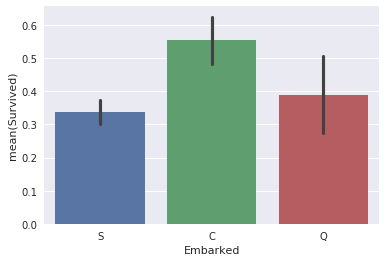

In [170]:
# it appears only that having parents or children helps you live. Havingsiblins and spouses doesnt. 


sns.barplot(x="Embarked", y='Survived', data= titatanicgraph)

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


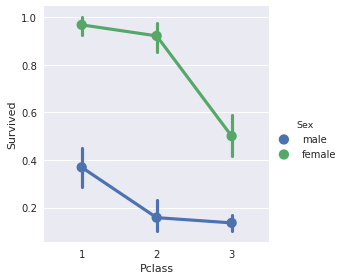

In [200]:
sns.factorplot(x="Pclass", y='Survived', data= titatanicgraph, hue='Sex')

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


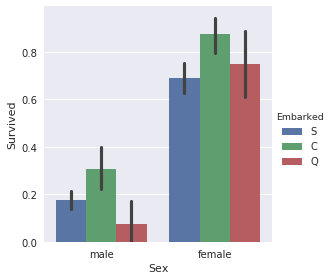

In [282]:
sns.factorplot(x="Sex", y='Survived', hue='Embarked', data= titatanicgraph, kind='bar')

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


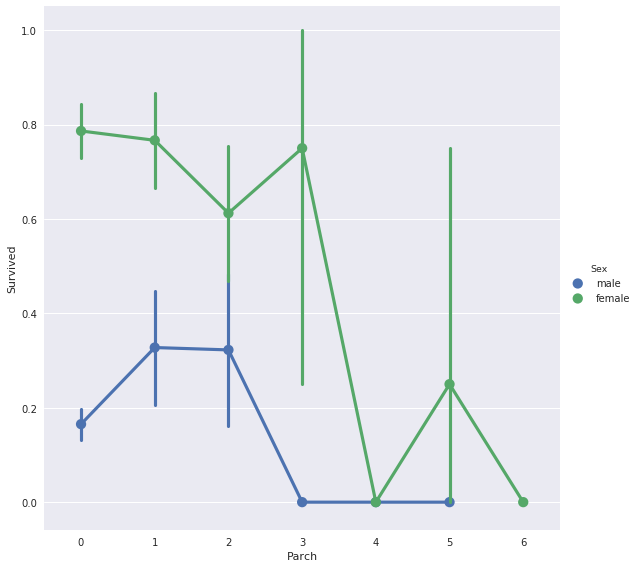

In [252]:
sns.factorplot(x='Parch', y='Survived',data= titatanicgraph, hue='Sex', size=8)

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


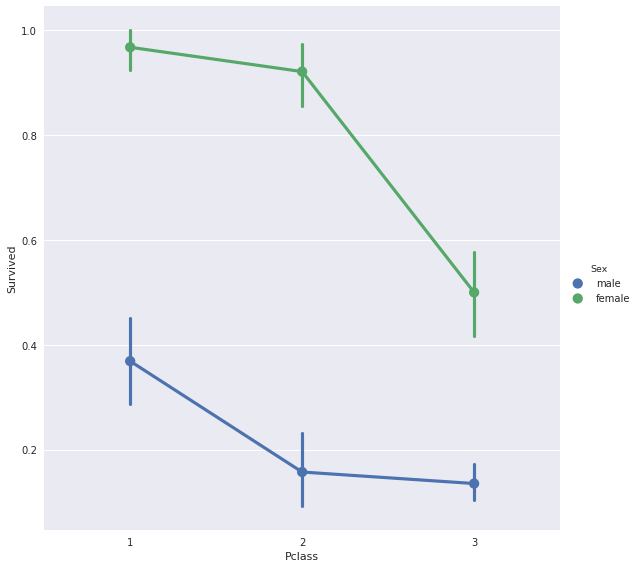

In [253]:

sns.factorplot(x='Pclass', y='Survived',data= titatanicgraph, hue='Sex',size=8)

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


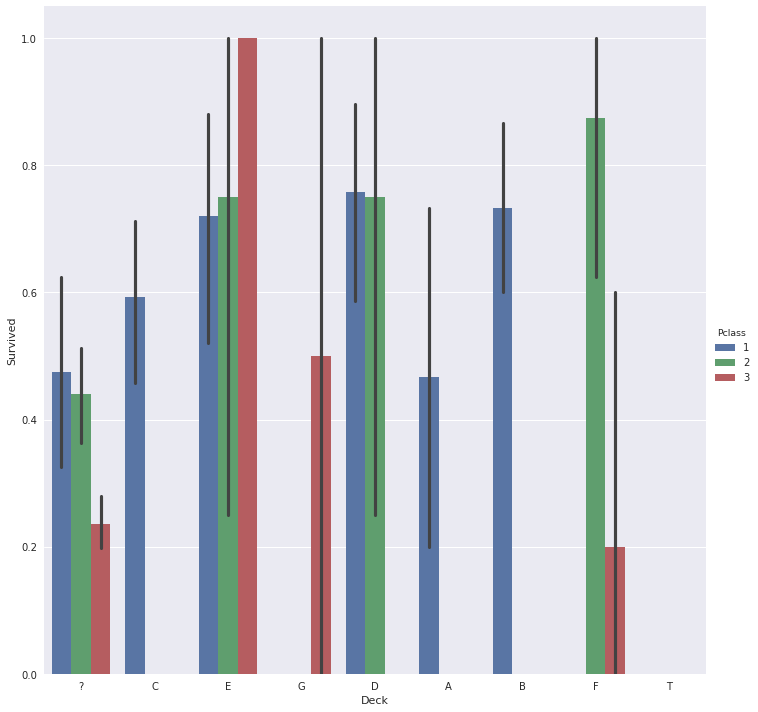

In [251]:

sns.factorplot(x='Deck', y='Survived',data= titatanicgraph, hue='Pclass', kind='bar', size=10);


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


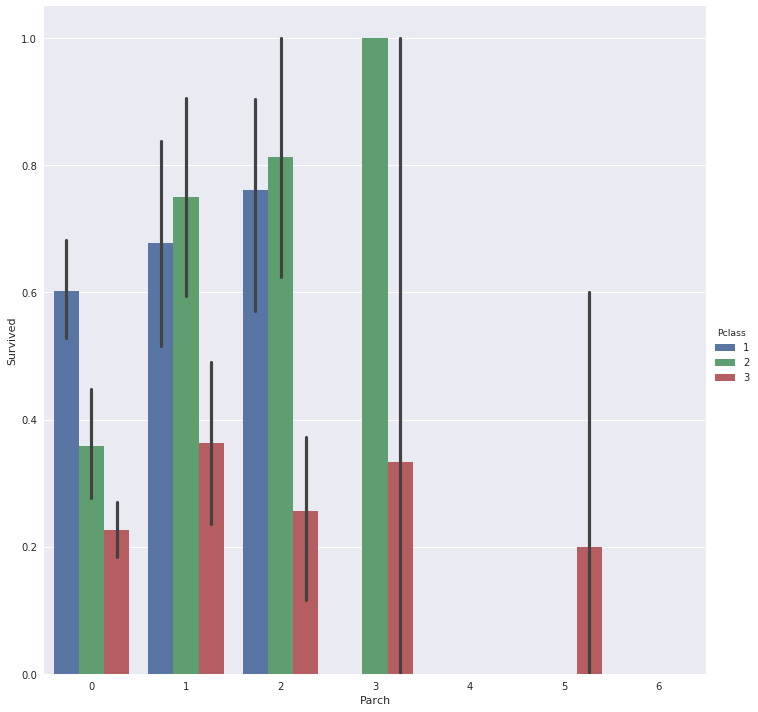

In [255]:
sns.factorplot(x='Parch', y='Survived',data= titatanicgraph, hue='Pclass', kind='bar',size=10)

In [ ]:
sns.factorplot(x='Fa', y='Survived',data= titatanicgraph, hue='Pclass', size=10)

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


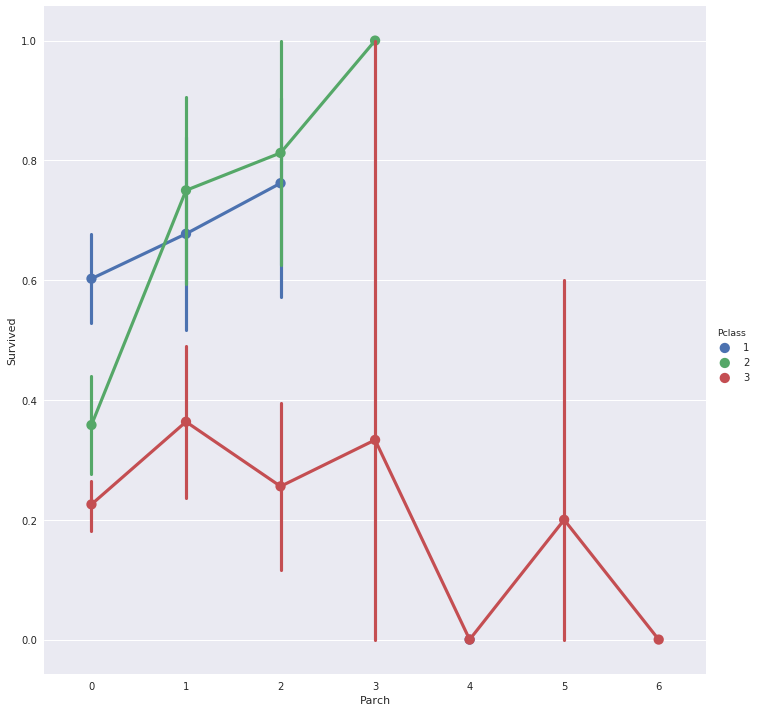

In [256]:
sns.factorplot(x='Parch', y='Survived',data= titatanicgraph, hue='Pclass', size=10)

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


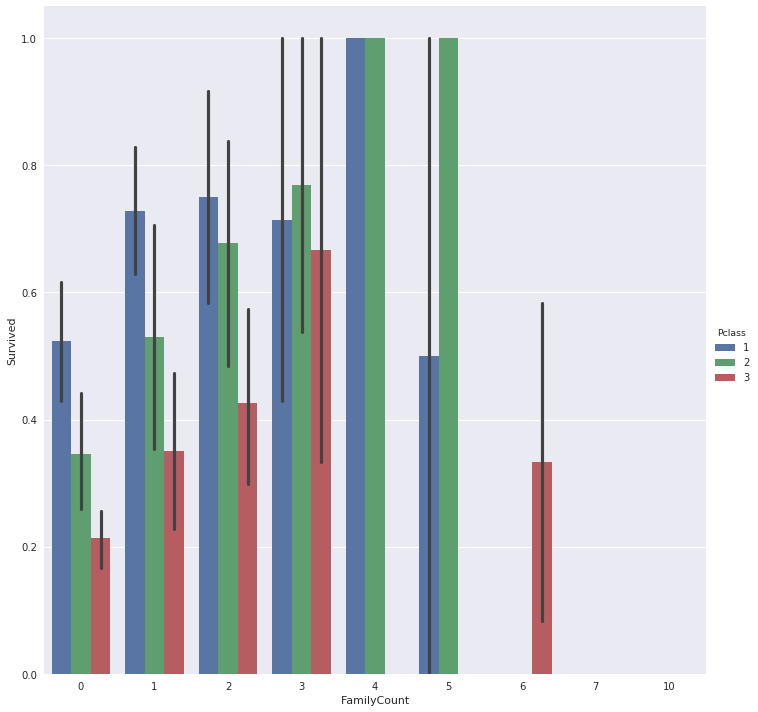

In [257]:

sns.factorplot(x='FamilyCount', y='Survived',data= titatanicgraph, hue='Pclass', kind='bar',size=10)

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


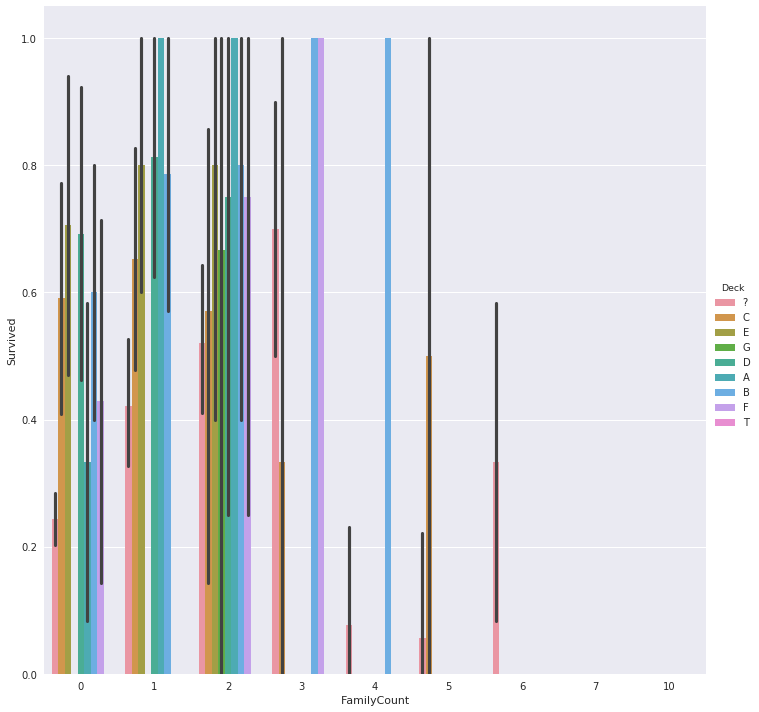

In [259]:
sns.factorplot(x='FamilyCount', y='Survived',data= titatanicgraph, hue='Deck', kind='bar',size=10)


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


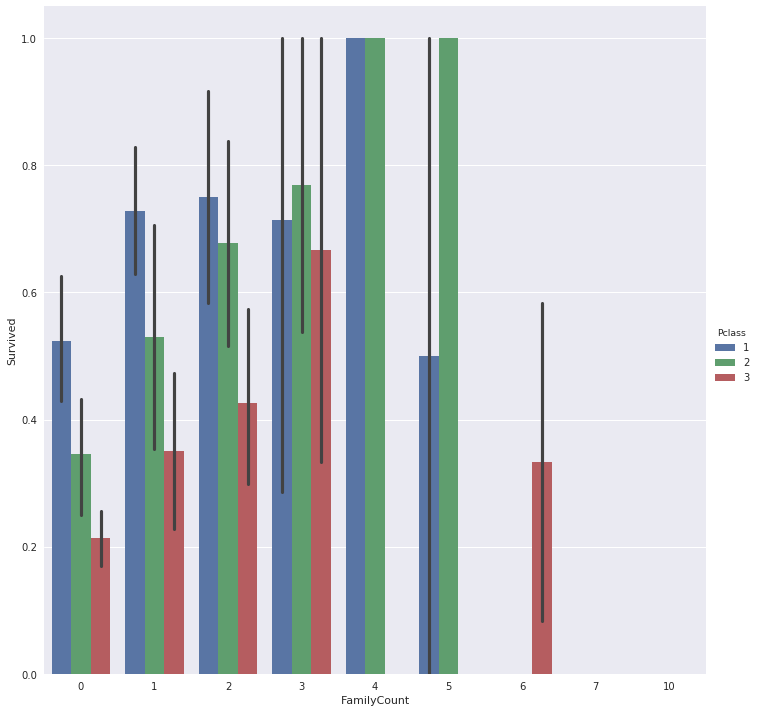

In [261]:
sns.factorplot(x='FamilyCount', y='Survived',data= titatanicgraph, hue='Pclass', kind='bar', size=10)

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


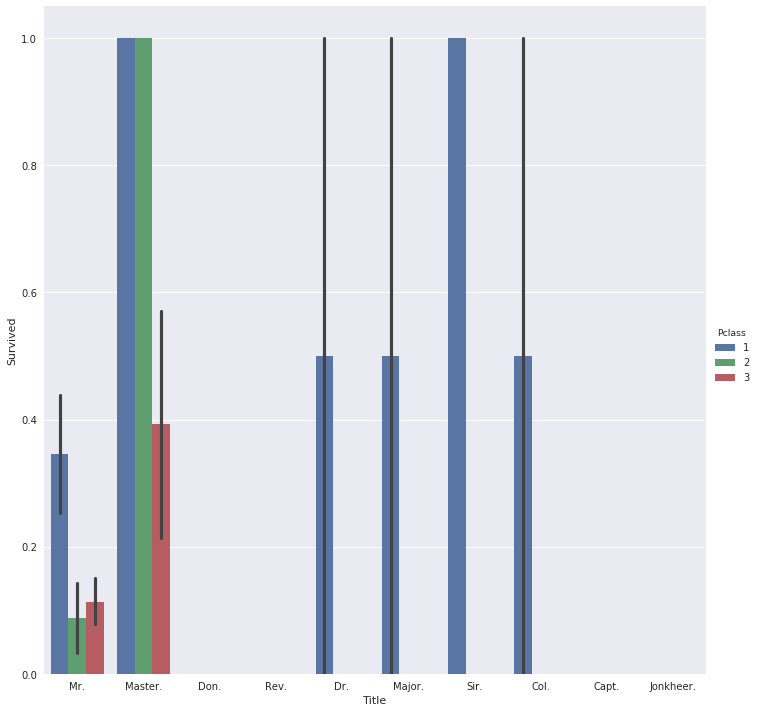

In [263]:
sns.factorplot(x='Title', y='Survived',data= titatanicgraph[titatanicgraph['Sex']=='male'], hue='Pclass', kind='bar', size=10)

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


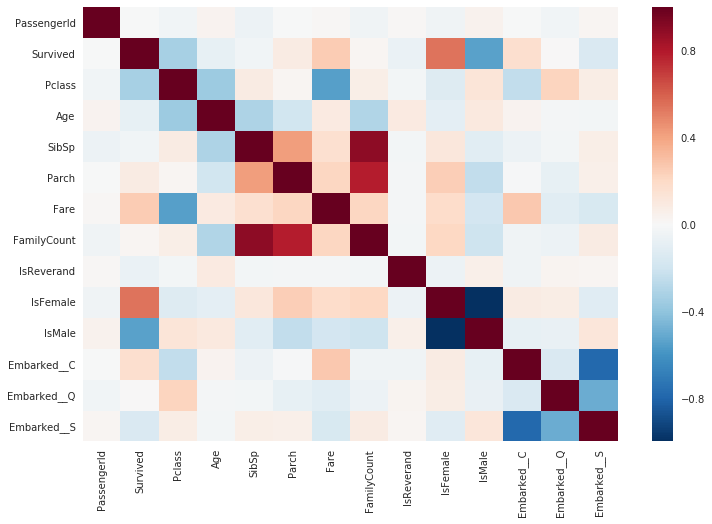

In [264]:
plt.figure(figsize=(12, 8))
sns.heatmap(titatanicgraph.corr())

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


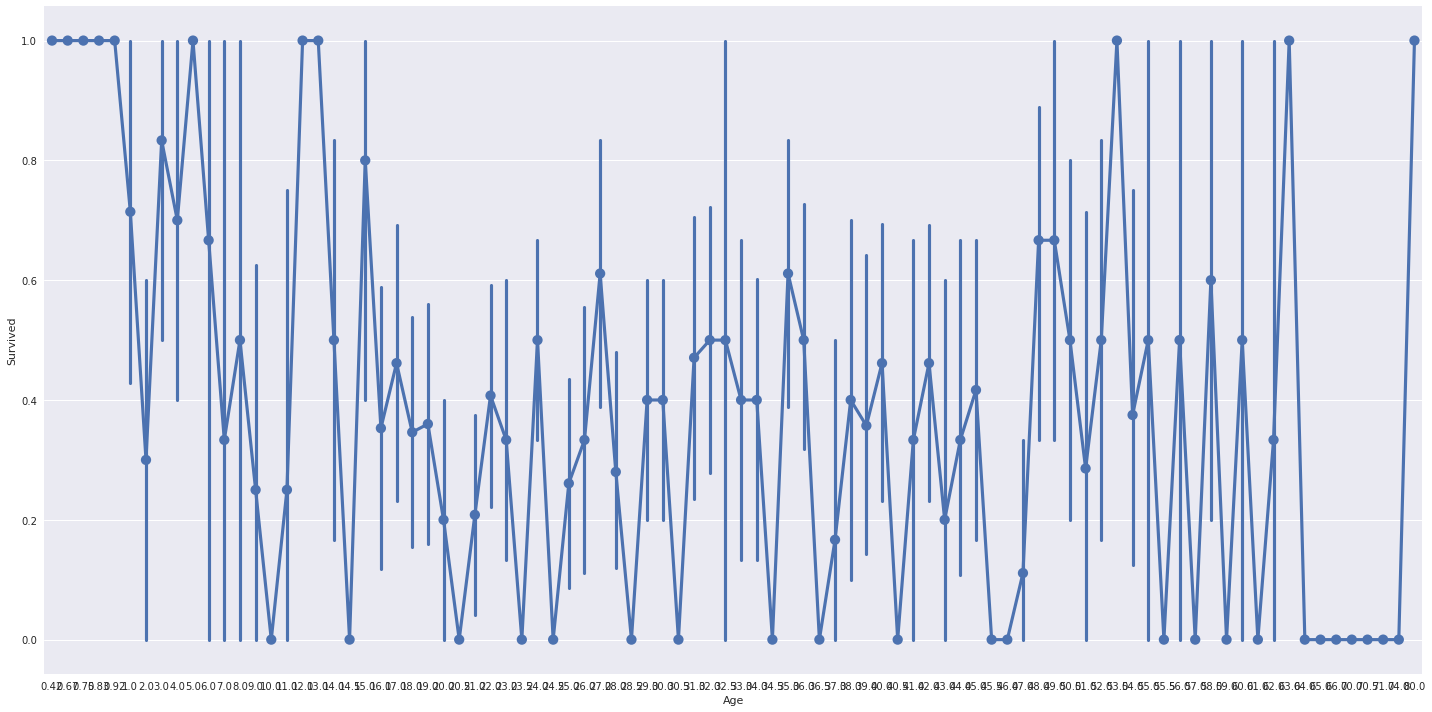

In [272]:
sns.factorplot(x='Age', y='Survived',data= titatanicgraph, size=10, aspect= 2)

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


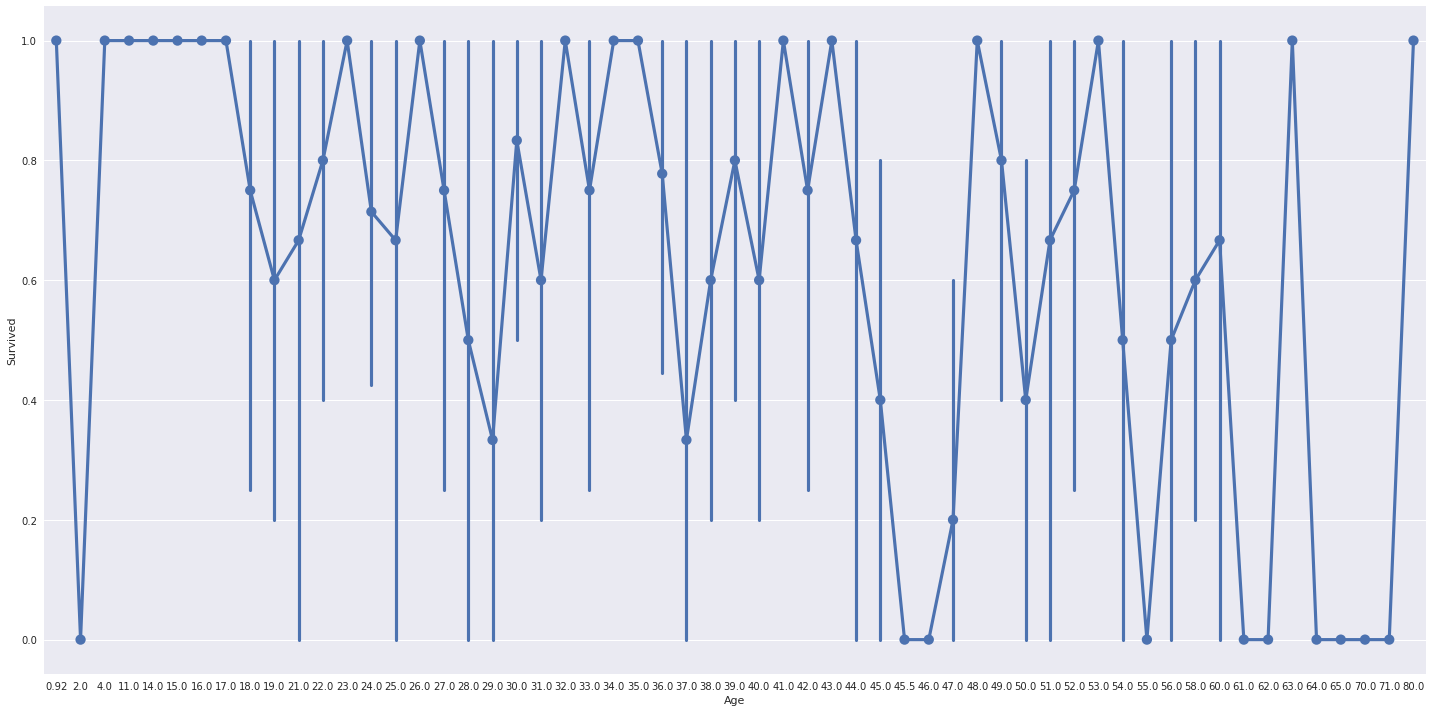

In [274]:
sns.factorplot(x='Age', y='Survived',data= titatanicgraph[titatanicgraph['Pclass']==1], size=10, aspect= 2)
                                                          

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


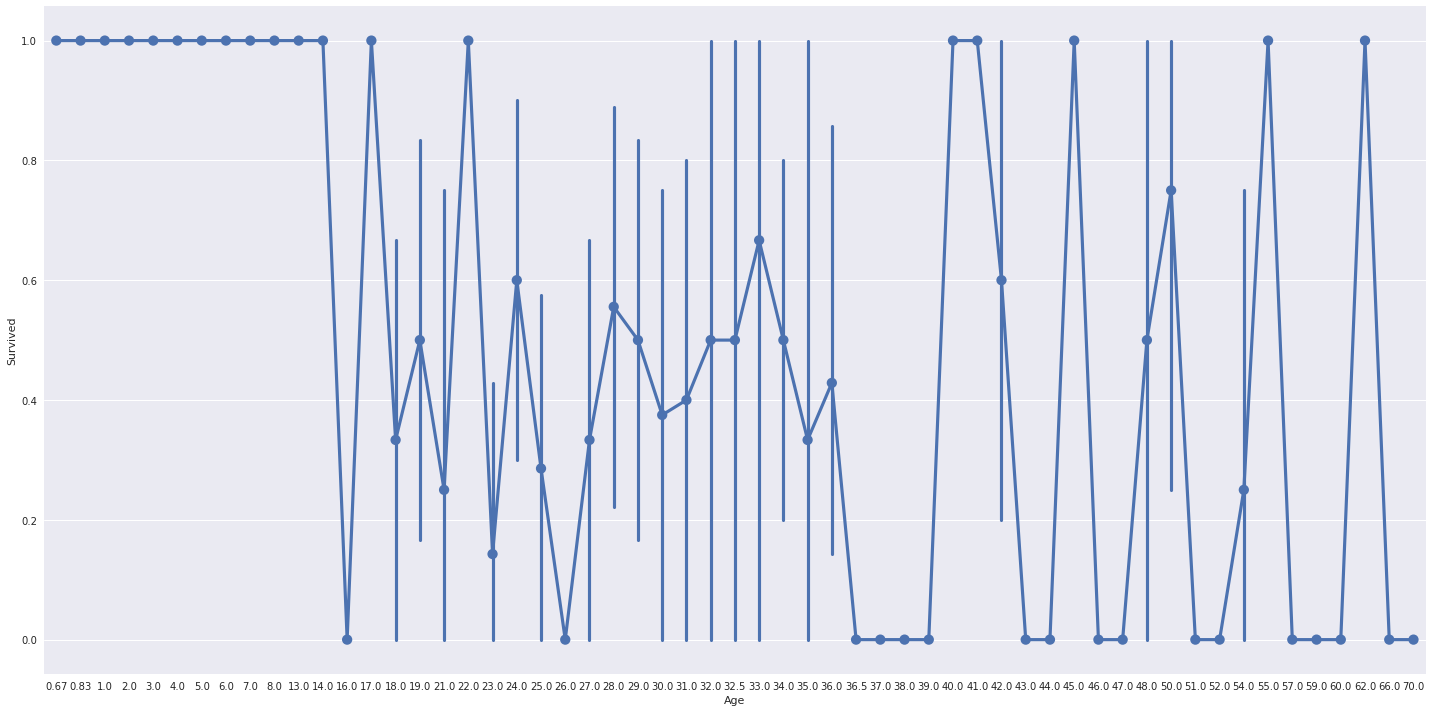

In [277]:
sns.factorplot(x='Age', y='Survived',data= titatanicgraph[titatanicgraph['Pclass']==2], size=10, aspect= 2)

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


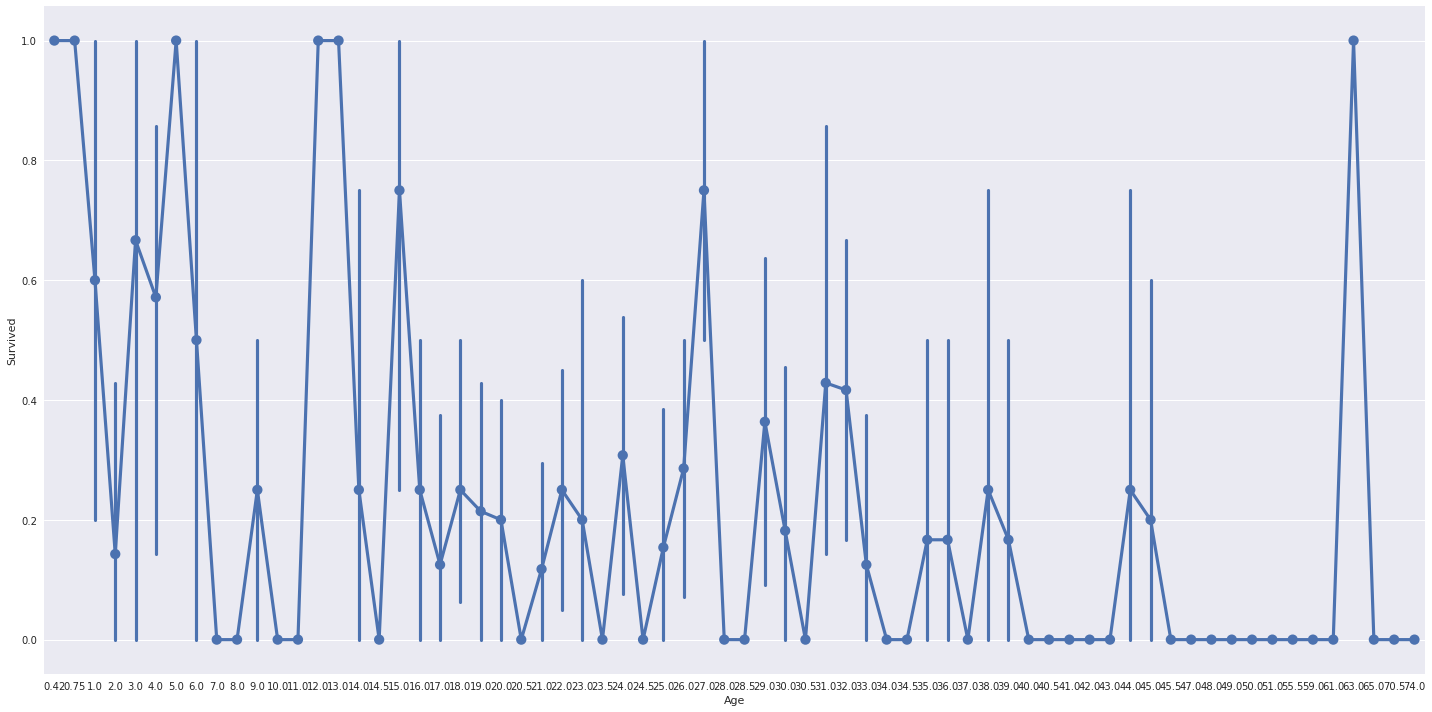

In [279]:
sns.factorplot(x='Age', y='Survived',data= titatanicgraph[titatanicgraph['Pclass']==3], size=10, aspect= 2)

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


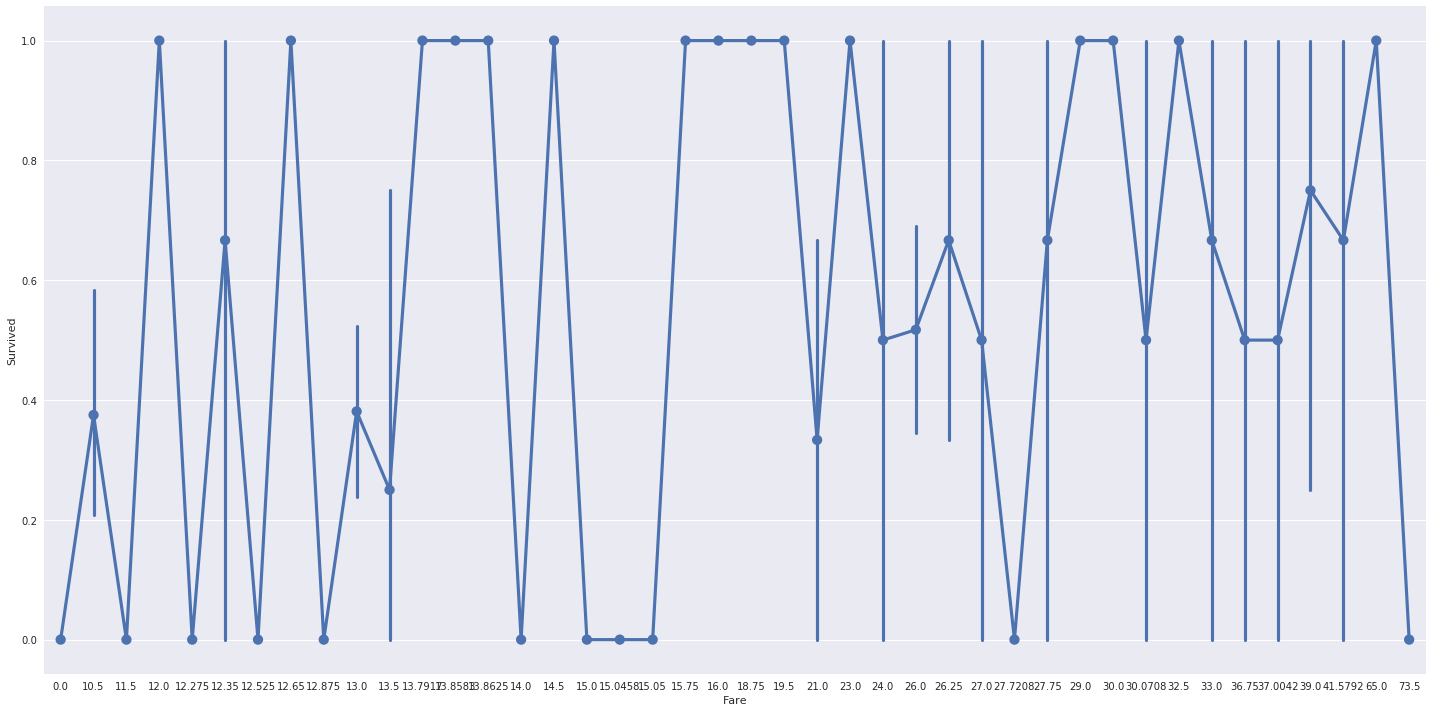

In [280]:
sns.factorplot(x='Fare', y='Survived',data= titatanicgraph[titatanicgraph['Pclass']==2], size=10, aspect= 2)

Current conclusions:
Gender, Age and Social status were huge factors in survival. Social status can be measured several different ways (Title, Class, Fare). 
Physical location on the ship (what deck people were on) is a significant factor. 
Family count (Parents and children) is more significant than total family count, which is more significant than siblings and spouses. Visual data analyis of this indicates that these variables have different effects for class, and that this is not a linear function (Having a very large family appears to be worse than having a small family which is worse than being alone). 
